In [17]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer

### todo es con data imputada, y con variables categoricas en funcion de la mas comun 

In [3]:
archivo= pandas.read_csv("dataimputada2.csv", decimal=".")

In [4]:
archivo.shape

(91713, 200)

In [34]:
result = archivo.isnull().sum()/91713
r = result.sort_values(ascending=True) 
data2 = archivo[r[r<=0.00].reset_index()["index"]].drop(columns=["encounter_id", "readmission_status"]) 
data2.shape

(91713, 119)

In [35]:
data3 =data2.drop(columns=["hospital_death"])
data3.shape

(91713, 118)

## NORMALIZAR LOS DATOS

In [36]:
variables_1=['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'weight', "bmi"
, 'bun_apache', 'creatinine_apache', 'sodium_apache', 'temp_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_min', "d1_diasbp_noninvasive_min", "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_noninvasive_max",  "d1_mbp_noninvasive_min", "d1_resprate_max", "d1_resprate_min", "d1_spo2_max", "d1_spo2_min", "d1_sysbp_max", "d1_sysbp_min", "d1_sysbp_noninvasive_max", "d1_sysbp_noninvasive_min", "d1_temp_max", "d1_temp_min", "h1_diasbp_max", "h1_diasbp_min", "h1_diasbp_noninvasive_max", "h1_diasbp_noninvasive_min", "h1_heartrate_max", "h1_heartrate_min", "h1_mbp_max", "h1_mbp_min", "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_spo2_max", "h1_spo2_min", "h1_sysbp_max", "h1_sysbp_min", "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min", "h1_temp_max", "h1_temp_min", "d1_bun_max", "d1_bun_min", "d1_calcium_max", "d1_calcium_min", "d1_creatinine_max", "d1_creatinine_min", "d1_glucose_max", "d1_glucose_min", "d1_hco3_max", "d1_hco3_min", "d1_hemaglobin_min", "d1_platelets_max", "d1_platelets_min", "d1_potassium_max", "d1_potassium_min", "d1_sodium_min", "d1_wbc_max", "d1_wbc_min", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]
variables_2=['age', 'height',  'hematocrit_apache','map_apache', "d1_mbp_min", "d1_hemaglobin_max", "d1_hematocrit_max", "d1_hematocrit_min", "d1_sodium_max"]

variables_continuas= variables_1+variables_2

# solo las columnas continuas
continuas=[]
for var in variables_continuas:
    if var in list(data2.columns):
        continuas.append(var)
            
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Fit on training set only.
dataNorm= scaler.fit_transform(data2[continuas]) 
norm= pd.DataFrame(dataNorm, columns= continuas)


# sin continuas
data_otros= data2.drop(columns= continuas)
        

In [57]:
result = pd.merge(data_otros.reset_index(),
                  norm.reset_index(), 
                  left_index=True, 
                  right_index=True)

data_norm=result.drop(columns=["index_x","patient_id" ])

In [58]:
for var in list(result.columns):
    if var not in list(data2.columns):
        result.drop(columns= var)

### LOGISTIC REGRESSION 

In [60]:
data3 =data_norm.drop(columns=["hospital_death"])
data3.shape

(91713, 119)

In [61]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, data3, data_norm["hospital_death"], scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Mean recall: %.3f' % mean(scores))

Mean recall: 0.732


In [111]:
# con data normalizda
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, data_norm, data2["hospital_death"], scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Mean recall: %.3f' % mean(scores))

Mean recall: 0.749


## Regularizacion

In [101]:
from sklearn.feature_selection import SelectFromModel

train, valid, _ = get_data_splits(data2)

X, y = train[train.columns.drop("hospital_death")], train['hospital_death']

# Set the regularization parameter C=1
alphas= [1e-10, 1e-9,1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1,2,3,4]
for a in alphas: 
    logistic = LogisticRegression(C=1, penalty="l2", random_state=7).fit(X, y)
    model = SelectFromModel(logistic, prefit=True)
    coefs.append(ridge.coef_)





logistic = LogisticRegression(C=1, penalty="l2", random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)
X_new

c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[233., 233.,  15., ..., 119.,  37.,  73.],
       [487., 557.,  26., ..., 118.,  31.,  67.],
       [187., 196.,  23., ...,  96.,  48., 105.],
       ...,
       [187., 196.,  23., ..., 103.,  89., 158.],
       [116., 116.,  23., ...,  77.,  52.,  95.],
       [182., 182.,  12., ..., 145.,  81., 125.]])

In [102]:
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=X.index,
                                 columns=X.columns)

# Dropped columns have values of all 0s, keep other columns 
selected_columns = selected_features.columns[selected_features.var() != 0]

In [ ]:
beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, Y_train, beta, lambd)))

lambd_values = np.logspace(-2, 3, 50)
train_errors = []
test_errors = []
beta_values = []
for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, Y_train, beta))
    test_errors.append(mse(X_test, Y_test, beta))
    beta_values.append(beta.value)

In [ ]:
def plot_regularization_path(lambd_values, beta_values):
    num_coeffs = len(beta_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in beta_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, beta_values

### recall con las variables seleccionadas   de regularizacion

In [116]:
variables_selecc=list(selected_columns)
matriz= data_norm[variables_selecc]


from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, matriz, data2["hospital_death"], scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Mean recall: %.3f' % mean(scores))


Mean recall: 0.695


In [134]:
variables_selecc

['d1_platelets_min',
 'd1_platelets_max',
 'd1_hco3_min',
 'd1_bun_min',
 'd1_bun_max',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_min',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_spo2_min',
 'h1_sysbp_min',
 'h1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'wbc_apache',
 'h1_diasbp_min',
 'bun_apache',
 'apache_2_diagnosis',
 'weight',
 'age',
 'd1_diasbp_min',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_spo2_min',
 'd1_mbp_min',
 'd1_sysbp_min',
 'd1_heartrate_max',
 'd1_diasbp_noninvasive_min',
 'd1_sysbp_noninvasive_min']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# X es la 10x10 matrix de Hilbert
X = data3
y = data2["hospital_death"]
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
coefs = []
for a in alphas: 
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
# mostramos resultados
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coeficientes de cresta en función de la regularización')
plt.axis('tight')


c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.62843e-25): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.78527e-25): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.01652e-25): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.17462e-25): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWar

c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.64663e-24): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.29299e-24): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.99719e-24): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.77391e-24): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWar

c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.23991e-22): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.45711e-22): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.69547e-22): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.95683e-22): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWar

c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.54861e-21): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.28071e-21): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.08383e-21): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.96483e-21): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWar

c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.54393e-19): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.79065e-19): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.06131e-19): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.35821e-19): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWar

c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.57313e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.4046e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.03167e-17): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.13173e-17): result may not be accurate.
  overwrite_a=True).T
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarn

(0.025118864315095794,
 3.9810717055349695e-11,
 -0.2294903377930254,
 0.13893041045974475)

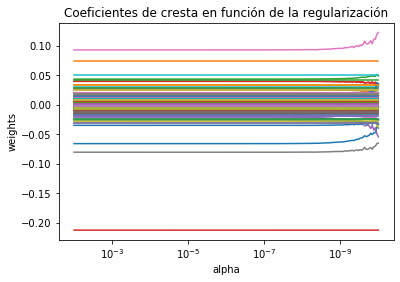

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# X es la 10x10 matrix de Hilbert
X = data3
y = data2["hospital_death"]
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
coefs = []
for a in alphas: 
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
# mostramos resultados
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coeficientes de cresta en función de la regularización')
plt.axis('tight')


### otro metodo de regularizacion

In [150]:
from sklearn import datasets
import numpy as np
X = data3
y = data2["hospital_death"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    http

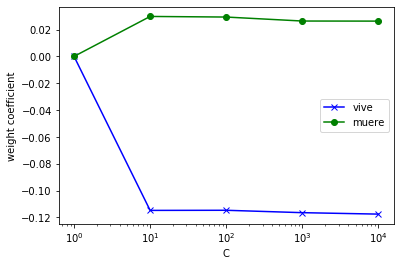

In [160]:
from sklearn.linear_model import LogisticRegression

weights, params = [], []
for c in np.arange(1e-15,5):
    lr = LogisticRegression(C=c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append((lr.coef_)[0])
    params.append(10**c)

weights = np.array(weights)

# Decision region drawing
import matplotlib.pyplot as plt

plt.plot(params, weights[:, 0], color='blue', marker='x', label='vive')
plt.plot(params, weights[:, 1], color='green',  marker='o', label='muere')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

## REGULARIZACION 2 

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [183]:
data4= data_norm

In [184]:
data_norm.shape

(91713, 120)

## 3. Selecting Numerical Columns

In [185]:
data4.shape

(91713, 120)

In [187]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data4.select_dtypes(include=numerics).columns)
data5 = data4[numerical_vars]
data5.shape

(91713, 122)

In [189]:
X_train, X_test, y_train, y_test = train_test_split(
    data5.drop(labels=['hospital_death'], axis=1),
    data5['hospital_death'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((64199, 121), (27514, 121))

In [190]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [197]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', class_weight="balanced"))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, matriz, data2["hospital_death"], scoring='recall', cv=cv, n_jobs=-1)


c:\users\inspiron\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight='balanced',
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

### Selecc the fratures

In [193]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 121
selected features: 37
features with coefficients shrank to zero: 0


In [195]:
np.sum(sel_.estimator_.coef_ == 0)

0

In [ ]:
scores = cross_val_score(model, matriz, data2["hospital_death"], scoring='recall', cv=cv, n_jobs=-1)